<a href="https://colab.research.google.com/github/scudilio/Visualizacao_de_dados/blob/master/Scatterplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





#**Série: "Visualização de dados"**
##**Scatter plots: Um guia completo para gráficos de dispersão**

Os gráficos de dispersão ou Scatter plot são representações gráficas do relacionamento entre duas variáveis numéricas. O Scatter plot utiliza pontos para representar essa relação, cada ponto representa o valor de uma variável no eixo horizontal e o valor de outra variável no eixo vertical.





In [0]:
from google.colab import files
from IPython.display import Image
uploaded=files.upload()

Saving scartterplot.png to scartterplot.png


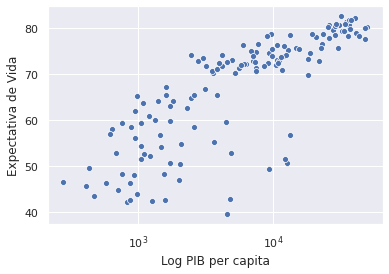

In [0]:
Image('scartterplot.png')

No gráfico acima, temos o gráfico de dispersão do logaritmo do PIB (Produto Interno Bruto) per capita pela Expectativa de Vida. Cada ponto do gráfico apresenta o valor do logaritmo do PIB per capita de um país em relação a Expectativa de Vida do país. Observa-se, que quanto maior o PIB per capita, maior a expectativa de vida. Ou seja, existe uma correlação positiva entre essas variáveis (quanto uma variável aumenta a outra variável também aumenta).

##**Quando você deve usar um gráfico de dispersão?**

Descrito por Francis Galton, o Scatter plot é usado para verificar se existe uma relação entre causa e efeito entre duas variáveis numéricas. Isso não significa que uma variável causa efeito na outra, mas apenas se existe uma relação e qual intensidade entre essa relação.
A relação entre duas variáveis pode ser positiva, negativa ou neutra, linear ou não linear. 



In [0]:
from google.colab import files
from IPython.display import Image
uploaded=files.upload()

Saving scatterplot.png to scatterplot.png


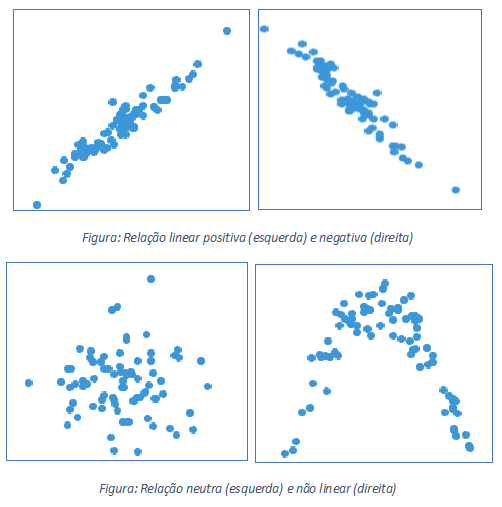

In [0]:
Image('scatterplot.png')

O gráfico de dispersão não mostra apenas o valor individualmente, mas mostra os dados como um todo. Sendo útil para identificar outro padrões nos dados, como outlier (pontos extremos) ou possíveis grupos entre os dados. 


In [0]:
from google.colab import files
from IPython.display import Image
uploaded=files.upload()

Saving outlier.png to outlier.png


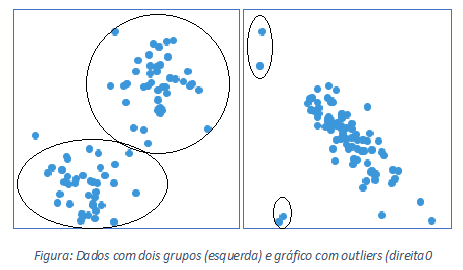

In [0]:
Image('outlier.png')


##**Exemplo de estrutura de dados**


Para criar gráficos de dispersão precisamos de um conjunto de dados, que tenha no mínimo duas variáveis numéricas (variáveis quantitativas). Aqui vamos utilizar o dataset ‘gapminder’. 
Esse conjunto de dados ficou muito famoso após a apresentação do Hans Rosling, um doutor e estatístico sueco que apresentava e ilustrava os dados através de uma história atraente (storytelling). 
Os dados gapminder resume informações da população, PIB e expectativa de vida dos países ao longo do tempo.

O conjunto de dados está disponível em 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'

In [0]:
#Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import plotly.express as px


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Acesso ao drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [15]:
##IMPORTANDO ARQUIVOS
#escrevendo em um arquivo csv
df= pd.read_excel('/content/drive/My Drive/kaggle_datasets/gapminder_final.xlsx')

df.head()

,country,year,gdpPercap,lifeExp,pop,continent
0,Afghanistan,1920,1490,30.6,10600000,Asia
1,Afghanistan,1921,1520,30.7,10500000,Asia
2,Afghanistan,1922,1550,30.8,10300000,Asia
3,Afghanistan,1923,1570,30.8,9710000,Asia
4,Afghanistan,1924,1600,30.9,9200000,Asia


##**Como construir um Scatter plot**

O gráfico de dispersão mais comum é o bivariado, onde temos duas variáveis contínuas e buscamos entender a relação entre elas. Aqui utilizaremos a variável expectativa de vida e o logaritmo do PIB per capita.

Utilizamos a escala logarítmica, pois os dados do PIB per capita possui muito valores com alta variabilidadee e o logaritmo reduz a escala dos dados facilitando a visualização dos dados.

Para construir o Scatter plot utilizaremos a biblioteca 'plotly.express'. 'Plotly' é uma biblioteca de visualização de dados em Python, com ela é possível construir gráficos interativos de maneira simples e que são esteticamentes bonitos.

Para construir o Scatter plot utilizamos a função 'scatter' e com apenas uma linha de código geramos o gráfico. As funções 'upddate' é para configurar a aparência, o título e eixos dos gráficos.

In [27]:
import plotly.express as px
fig=px.scatter(df, x='gdpPercap', y='lifeExp',log_x=True,width=800)
fig.update_traces(marker=dict(size=12,line=dict(width=2)),selector=dict(mode='markers'))
fig.update_layout(title='Logaritmo do PIB per capita X Expectativa de vida')
fig.update_xaxes(title='Log(PIB per capita)')
fig.update_yaxes(title='Expectativa de vida')
fig.show()

Observe que quanto maior o PIB per capita de um país maior é a expectativa de vida. Vale ressaltar, que nesse primeiro gráfico plotamos todos os anos juntos, causando uma poluição visual. 

Sendo esse um dos problemas dos gráficos de dispersão, muitos pontos em um gráfico só. Detalhamos esse problema a seguir




## **Principais problemas ao utilizar gráficos de dispersão**

###**Overplotting**

Quando temos muitos dados a serem plotados, os pontos podem se sobrepor a um grau que fica difícil ver a relações entre as variáveis. Existem algumas maneiras de resolver esse problema, uma das alternativas é plotar apenas uma subconjunto dos dados, uma amostra aleatória deve fornecer a idéia geral dos padrões dos dados.

Para aplicar essa técnica de amostragem utilizaremos a função 'sample', para selecionar 1000 observações aleatória do data set.

In [24]:
df_sample = df.sample(n=1000)
fig=px.scatter(df_sample, x='gdpPercap', y='lifeExp',log_x=True,width=800)
fig.update_traces(marker=dict(size=12,line=dict(width=2)),selector=dict(mode='markers'))
fig.update_layout(title='Logaritmo do PIB per capita X Expectativa de vida')
fig.update_xaxes(title='Log (PIB per capita)')
fig.update_yaxes(title='Expectativa de vida')
fig.show()

Observe que mesmo considerando apenas uma amostra do conjunto de dados, mantemos a idéia geral dos dados. Quanto maior o PIB per capita, maior a expectativa de vida.

A segunda alternativa para resolver o overplotting, é colocar transparência nos pontos, permitindo que as sobreposições sejam visíveis. Para isso utilizamos a opção 'opacity'

In [26]:
fig=px.scatter(df_sample, x='gdpPercap',opacity=0.5, y='lifeExp',log_x=True,width=800,)
fig.update_layout(title='Logaritmo PIB per capita X Expectativa de vida')
fig.update_xaxes(title='Log (PIB per capita)')
fig.update_yaxes(title='Expectativa de vida')
fig.show()

Observe que a transparência deixa o gráfico menos poluído visualmente. A seguir discutiremos um outro problema dos gráficos de dispersão.

###**Interpretar correlação como causalidade**


"*Correlação não implica causalidade*"

O problema aqui não é o gráfico em si, mas a sua interpretação. Observar uma relação entre duas variáveis em um gráfico de dispersão, não implica que a mudança em uma variável é responsável pela mudança na outra variável. 

 

É possível que exista uma terceira variável influenciando as duas variáveis plotadas ou que o padrão seja mera coincidência. Por isso, cuidado com a interpretação.


##**Diferentes tipos de Scatter plot**
Para construir os diferentes tipos de Scatter plot iremos considerar apenas os dados de 2019.


##**Bivariado**

Como comentado anteriormente, o gráfico de dispersão mais comum é o bivariado, quando temos duas variáveis numéricas e queremos entender sua relação.


Utilizamos a função 'scatter' para construir o gráfico, mesma função utilizada anteriormente, e acrescentamos uma opção 'hover_name = "country"', essa opção faz aparecer no gráfico o nome do país correspondente ao ponto, quando o mouse tiver sobre o ponto desejado. 

In [28]:
df_2019 = df[df["year"]==2019]
fig=px.scatter(df_2019, x="gdpPercap", y="lifeExp", hover_name="country", log_x=True, size_max=90,width=800)
fig.update_traces(marker=dict(size=12,line=dict(width=2)),selector=dict(mode='markers'))
fig.update_layout(title='Logaritmo do PIB per capita X Expectativa de vida no ano de 2019')
fig.update_xaxes(title='Log (PIB per capita)')
fig.update_yaxes(title='Expectativa de vida')
fig.show()

Novamente temos a mesma conclusão, quanto maior o PIB per capita, maior é a expectativa de vida. 

Agora, e se o interesse for analisar a relação do PIB per capita e expectativa de vida em cada continente?  

Podemos fazer três gráficos distintos, uma para cada continente, para isso incluímos a opção 'facet_col'

In [30]:

fig=px.scatter(df_2019, x="gdpPercap", y="lifeExp",  hover_name="country", log_x=True, size_max=60,facet_col='continent')
fig.update_traces(marker=dict(size=12,line=dict(width=2)),selector=dict(mode='markers'))
fig.update_layout(title='Logaritmo do PIB per capita X Expectativa de vida no ano de 2019')
fig.update_xaxes(title='Log (PIB per capita)')
fig.update_yaxes(title='Expectativa de vida')
fig.show()

Observe que na África temos os piores índices de PIB per capita e expectativa de vida e a Europa é onde temos os melhores índices. 

Porém, fica difícil comparar a relação entre os continentes, para resolver esse problema podemos resumir esses gráficos em um só, apenas acrescentando uma variável a mais.



## **Scatterplot Trivariado**

Uma variação comum do Scatter plot é a adição de uma terceira variável, o acréscimo de uma terceira variável traz mais informações para o gráfico. A terceira variável pode ser categórica ou numérica. Veremos esses dois casos a seguir.

* **Variável Categórica**

Para uma terceira variável que possui valores categóricos (como continente), o mais comum é incluir cor aos pontos, onde cada cor irá associar a um grupo diferente, para isso acrescentamos a opção 'color' na função 'scatter'. 

In [38]:
fig=px.scatter(df_2019, x="gdpPercap", y="lifeExp", color="continent", 
               hover_name="country", log_x=True, width=800)
fig.update_traces(marker=dict(size=12,line=dict(width=2)),selector=dict(mode='markers'))
fig.update_layout(title='Logaritmo do PIB per capita X Expectativa de vida no ano de 2019')
fig.update_xaxes(title='Log (PIB per capita)')
fig.update_yaxes(title='Expectativa de vida')
fig.show()

Acrescentando a variável continente, observa-se que os paises com menores PIB per capita e expectativa de vida são os paises da África. E os paises com as maiores expectativas de vidas e PIB per capita são da Europa em sua maioria. 

Vale ressaltar que existe alguns pontos discrepantes, que possui baixa expectativa de vida, como a República Centro-Africa e Lesoto. Além de Suazilândia que mesmo com um PIB mediano, possui uma expectativa de vida menor do que os paises com PIB similar. O país com o melhor PIB e expectativa de vida é Singapura.

Uma outra maneira de representar uma variável categórica num gráfico de dispersão é utilizando símbolos, para isso utilizamos a opção 'symbol' na função 'scatter', porém fica mais difícil a visualização.

In [48]:
fig=px.scatter(df_2019, x="gdpPercap", y="lifeExp", symbol="continent", hover_name="country", log_x=True, size_max=60,height = 800,width=1200)
fig.update_traces(marker=dict(size=12,line=dict(width=2)),selector=dict(mode='markers'))
fig.update_layout(title='Logaritmo do PIB per capita X Expectativa de vida no ano de 2019')
fig.update_xaxes(title='Log (PIB per capita)')
fig.update_yaxes(title='Expectativa de vida')
fig.show()

Para melhorar a visualização podemos utilizar as cores e símbolos

In [40]:
fig=px.scatter(df_2019, x="gdpPercap", y="lifeExp", symbol="continent",color='continent', hover_name="country", log_x=True, size_max=60, width=800)
fig.update_traces(marker=dict(size=12,line=dict(width=2)),selector=dict(mode='markers'))
fig.update_layout(title='Logaritmo do PIB per capita X Expectativa de vida no ano de 2019')
fig.update_xaxes(title='Log (PIB per capita)')
fig.update_yaxes(title='Expectativa de vida')
fig.show()

* **Variável Numérica**

Quando temos uma terceira variável numérica, como população, uma variação comum do Scatter plot é em relação ao tamanho dos pontos. Esses gráficos são conhecidos como gráficos de bolhas, onde pontos maiores indicam valores mais altos. Para construir esse gráfico, acrescentamos a opção 'size' na função 'scatter'.


In [41]:
fig=px.scatter(df_2019, x="gdpPercap", y="lifeExp", size="pop",  
               hover_name="country", log_x=True, size_max=60, width=800)
fig.update_layout(title='Logaritmo do PIB per capita X Expectativa de vida no ano de 2019')
fig.update_xaxes(title='Log (PIB per capita)')
fig.update_yaxes(title='Expectativa de vida')
fig.show()

Observe que os pontos maiores refere-se a população da China e da Índia. Para melhorar essa visualização podemos acrescentar a opção 'color' na função 'scatter'




In [42]:
fig=px.scatter(df_2019, x="gdpPercap", y="lifeExp", size="pop", color='pop', 
               hover_name="country", log_x=True, size_max=60, width=800)
fig.update_layout(title='Logaritmo do PIB per capita X Expectativa de vida no ano de 2019')
fig.update_xaxes(title='Log (PIB per capita)')
fig.update_yaxes(title='Expectativa de vida')
fig.show()

Agora temos o tamanho das bolhas e a cor indicando o tamanho populacional, as bolhas e amarelas são a China e Índia.

#**Scatter plot Multivariado**

E por último podemos visualizar esse gráfico utilizando 4 variáveis: 3 variáveis numéricas e 1 variável categórica. Aqui utilizaremos a opção size = 'pop' e color = 'continent'.

In [43]:


fig=px.scatter(df_2019, x="gdpPercap", y="lifeExp", size="pop", color="continent",
               hover_name="country", log_x=True, size_max=60,width=800)
fig.update_layout(title='Logaritmo do PIB per capita X Expectativa de vida no ano de 2019')
fig.update_xaxes(title='Log (PIB per capita)')
fig.update_yaxes(title='Expectativa de vida')
fig.show()


Uma quinta variável pode ser acrescentada ao gráfico utilizando a opção 'symbol', porém teriamos muita informação em um único gráfico e perderíamos informações, além de uma poluição visual.

 Também existe a versão 3D desse gráfico, em que acrescentaríamos um eixo a mais, ao invés de mudar o tamanho dos pontos. Assim utilizamos a função 'scatter_3d' e uma variável a mais, z = 'pop', para a construção do gráfico 3d.

In [44]:
df_2007 = df[df["year"]==2007]
px.scatter_3d(df_2007, x="gdpPercap", y="lifeExp", z="pop", color="continent", hover_name="country", log_x=True,log_z=True)


Apesar dos gráficos 3d serem uma opção de gráfico de dispersão, eles não são recomendados. Como podemos ver, gráficos 3d são difíceis de serem interpretados e visualizados, podendo levar a conclusão errôneas. Logo, **Evite gráficos 3d!**

##**Scatter plot Animado**

O gráfico de dispersão animado é uma opção que podemos fazer quando temos uma variável temporal. No dataset Gapminder temos a variável ano, que mostra o PIB per capita e a Expectativa de vida ao longo do tempo (1920 - 2020).

Utilizaremos essa variável para dar animação para o gráfico, ou seja, para cada ano iremos plotar um gráfico de Scatter plot com 4 variáveis (PIB per capita, Expectativa de vida, Continente e População). 

Para isso acrescentamos a opção animation_group="country" na função 'scatter'

In [47]:

px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country", log_x = True, width=900,
           size_max=60, range_x=[100,100000], range_y=[15,90])

Observe que na década de 1920 as expectativas de vidas eram bem baixa, a Rússia tinha expectativa de vida de 20 anos e a maior era a Australia com expectativa de vida de 60 anos. Também temos a China que tinha um dos menores PIB e expectativa de vida 
em 1920 e em 2020 está entre os paises desenvolvidos, com alta expectativa de vida e elevado PIB per capita.

Um país que vale comentar é Singapura, que nos anos de 1920 era uma país com uma baixo índice de PIB per capita e expectativa de vida e tornou-se o país com o maior PIB per capita e a maior expectativa de vida  do mundo. Sendo hoje um dos maiores centros financeiros do mundo e o quarto país mais rico do mundo.

##**Conclusão**

Gráficos de dispersão ou Scatter plot são utilizados para analisar relações entre duas variáveis numéricas. Nesse artigo abordamos diversas variações desse tipo de gráfico e também discutimos alguns problemas desses gráficos.

Além disso, utilizamos a biblioteca plotly do Python para construir gráficos mais agradáveis esteticamente e de maneira simples.

Gostou desse artigo? Qual outra variável do gráfico de dispersão você conhece?

# **Referências**

https://towardsdatascience.com/recreating-gapminder-animation-in-2-lines-of-python-with-plotly-express-2060c73bedec

https://chartio.com/learn/charts/what-is-a-scatter-plot/